In [45]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

## Load dataset

In [46]:
df = pd.read_csv('data/spamSMS.csv', encoding='latin-1')

In [47]:
# Check dataset
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<AxesSubplot:>

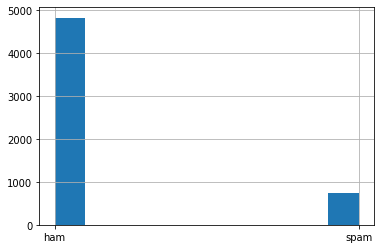

In [49]:
df['v1'].hist()

In [50]:
df['v1'].describe()

count     5572
unique       2
top        ham
freq      4825
Name: v1, dtype: object

In [51]:
df['v2'].describe()

count                       5572
unique                      5169
top       Sorry, I'll call later
freq                          30
Name: v2, dtype: object

# Feature extraction

In [52]:
vectorizer = CountVectorizer()
sms = vectorizer.fit_transform(df['v2'])
label = df['v1']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(sms, label, test_size=0.3, shuffle=True)

# SVM with Grid search

In [54]:
svm_model = svm.SVC()

In [55]:
param_grid = {
                'kernel': ['linear', 'rbf'],
                'C': [0.01, 0.1, 1, 5, 8, 10, 12, 15],
                'gamma': [0.01, 0.1, 1, 5, 8, 10, 12, 15]
                }

grid_search = GridSearchCV(svm_model, param_grid, scoring='accuracy')
grid_search.fit(x_train, y_train)

y_pred = grid_search.predict(x_test)

best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 5, 'gamma': 0.01, 'kernel': 'linear'}


In [56]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)


print("Accuracy:", accuracy)
print(f'confusion matrix is: \n {str(confusion)}')

Accuracy: 0.9832535885167464
confusion matrix is: 
 [[1443    1]
 [  27  201]]


## SVM with Random Search

In [57]:
svm_model = svm.SVC()

In [58]:
param_grid = {
    'C': uniform(loc=0, scale=15), 
    'kernel': ['linear', 'rbf'],
    'gamma': uniform(loc=0, scale=15)  
}

random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(x_train, y_train)

y_pred = random_search.predict(x_test)

best_params = random_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'C': 10.229652849670448, 'gamma': 5.757482419794081, 'kernel': 'linear'}


In [59]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print(f'confusion matrix is: \n {str(confusion)}')

Accuracy: 0.9832535885167464
confusion matrix is: 
 [[1443    1]
 [  27  201]]
